# Quantum Teleportatie

De bedoeling van dit Notebook is om Teleportatie ('Teleportation') uit te leggen en toe te passen met Qiskit.

## Inhoudstafel

1. [Overzicht](#overzicht)    
2. [Het Quantum Teleportatie Protocol](#how)       
3. [Het Simuleren van het Teleportatie Protocol](#simulating)   
    3.1 [Hoe gaan we dit resultaat testen op a echte Quantum Computer?](#testing)   
    3.2 [We gebruiken de Statevector Simulator](#simulating-sv)     
    3.3 [We gebruiken de QASM Simulator](#simulating-qs)    
4. [Teleportatie op een echte Quantum Computer](#real_qc)    
5. [Referenties](#references)



# 1. Overzicht <a id='overzicht'></a>

Alice wil quantum informatie naar Bob sturen. Meer bepaald, veronderstel dat ze hem de volgense "qubit state" of quantum toestand will sturen: 
$\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$. 
Dit omvat het overbrengen van informatie over $\alpha$ en $\beta$ naar Bob.

Er bestaat een stelling in de quantum mechanica die stelt dat je niet zomaar een exacte kopie kunt maken van een onbekende quantum toestand. Dit staat bekend als het "no-cloning" theorema, of het theorema dat je een "quantum state" niet kan klonen. Als resultaat hiervan kunnen we zien dat Alice niet zomaar een kopie van $\vert\psi\rangle$ kan genereren en de kopie aan Bob kan geven. We kunnen alleen klassieke toestanden kopiëren (geen superposities).

Door echter gebruik te maken van twee klassieke bits en een verstrengeld ("entangled") qubit paar, kan Alice haar toesten status $\vert\psi\rangle$ overbrengen naar Bob. We noemen dit teleportatie omdat Bob aan het einde $\vert\psi\rangle$ zal hebben en Alice niet meer.

In dit "notebook" zullen we afwisselend de Engelse term "state" vertalen door "toestand","status" of gewoon onvertaald laten. 

In de Python code maken we gebruik van Engelstalige namen voor de variabelen. Dit maakt de code internationaal bergijpbaar, terwijl deze contextuele uitleg in het Nederlands de drempel moet verlagen om aan de slag te gaan met dit algortime in Qiskit. 

# 2. Het Quantum Teleportatie Protocol <a id='how'></a>
Om een quantum bit te transferreren, moeten Alice en Bob een derde partij inschakelen, Jommeke, om hen een "entangled" of verstrengeld qubit paar te sturen. Alice voert dan een aantal operaties uit op haar qubit, stuurt de resultaten naar Bob over een klassiek communicatie kanaal. Bob voert dan een aantal operaties uit van zijn zijde, om de qubit van Alice te ontvangen. 

Hieronder beschrijven we de verschillende stappen op een Quantum Circuit. Hier worden er niet echt qubits verstuurd, dit aspect moet je je er even bij fantaseren !

We beginnen met het opzetten van onze sessie. 

In [1]:
# We starten met de noodzakelijke imports
import numpy as np
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
%matplotlib inline

Nu creëren we ons quantum circuit:

In [2]:
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
teleportation_circuit = QuantumCircuit(qreg, cregz, cregx)

#### Stap 1
Een derde partij, Jommeke, creëert een verstengeld ("entangled") qubit paar en geeft er één aan Bob en één aan Alice. 

Dit paar dat Jommeke creërt, is wel een speciaal paar, met name een "Bell" paar. Er zijn 4 zogenaamde Bell states maar wij kiezen er één uit van deze 4: eerst transferreren we één qubit naar de X-basis ($|+\rangle$ en $|-\rangle$) met behulpvan een Hadamard Gate, en dan passen we een CNOT Gate toe op de andere bit die als target qubit optreedt met de qubit in de X-basis als controle qubit. Dit is inderdaad één van de 4 "Bell States".

In [2]:
def create_bell_pair(qc, x, y):
    """Creëert een Bell paar in qc met behulp van de qubits x & y"""
    qc.h(x) # Plaats de qubit a in de "superposition" toestand |+>
    qc.cx(x,y) # Vervolgens gebruiken we CNOT om "entanglement" te bekomen met a als "control" and b als "target"
# Dit is één van de 4 bekende zogenaamde "Bell States" in Quantum Computing

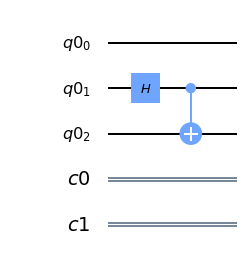

In [3]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
teleportation_circuit = QuantumCircuit(qreg, cregz, cregx)

## STAP 1
# In ons geval zorgt Jommeke ervoor dat qubits q1 en q2 verstrengeld ("entangled") zijn.
# We passen dit toe op ons circuit
create_bell_pair(teleportation_circuit, 1, 2)
# We bekijken ook even hoe het circuit eruit ziet tot nu toe
teleportation_circuit.draw(output='mpl')

Stel dat Alice in het bezit is van $q_0$ en Bob de eigenaar is van $q_2$ nadat hun wegen scheiden. Snik Snik. 

#### Stap 2 

Alice past een CNOT Gate toe to $q_1$, gecontrolleerd door $\vert\psi\rangle$ (dit is de qubit die ze naar Bob wil sturen). Dan past Alice een Hadamard Gate toe op $|\psi\rangle$. In ons quantum circuit, is de qubit ($|\psi\rangle$) die Alice wil sturen de qubit $q_0$:

In [4]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

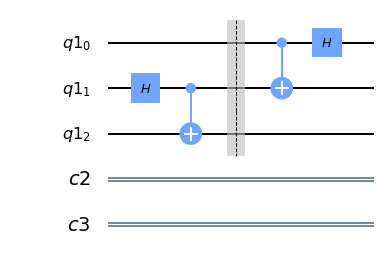

In [5]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
teleportation_circuit = QuantumCircuit(qreg, cregz, cregx)

## STAP 2.1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2.2
teleportation_circuit.barrier() # We gebruiken een "barrier" om de stappen te onderscheiden
alice_gates(teleportation_circuit, 0, 1)
# We bekijken ook even hoe het circuit eruit ziet tot nu toe
teleportation_circuit.draw(output='mpl')

#### Stap 3

Vervolgens past Alice een meeting toe op beide qubits die ze in bezit heeft, $q_1$ and $\vert\psi\rangle$, and slaat dit resultaat op in 2 "classical bits". Dan stuurt ze deze twee klassieke bits naar Bob.

In [6]:
def measure_and_send(qc, a, b):
    """Opmeten van qubits a & b and 'stuurt' de resultaten naar Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

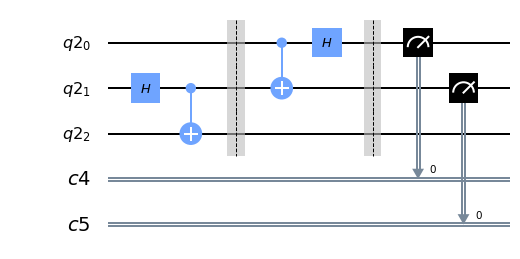

In [7]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
teleportation_circuit = QuantumCircuit(qreg, cregz, cregx)


## STAP 3.1
create_bell_pair(teleportation_circuit, 1, 2)

## STAP 3.2
teleportation_circuit.barrier() # We gebruiken een "barrier" om de stappen te onderscheiden
alice_gates(teleportation_circuit, 0, 1)

## STAP 3.3
measure_and_send(teleportation_circuit, 0 ,1)
# We bekijken ook even hoe het circuit eruit ziet tot nu toe
teleportation_circuit.draw(output='mpl')

#### Stap 4

Onze goeie ouwe Bob, dit al qubit $q_2$ heeft, past dan de volgende Quantum Gates toe, afhankelijk van de toestand van de klassieke bits: 

00 $\rightarrow$ DOE NIETS !

01 $\rightarrow$ PAS EEN $X$ GATE TOE !

10 $\rightarrow$ PAS EEN $Z$ GATE TOE !

11 $\rightarrow$ PAS EEN $ZX$ GATE TOE !

(*De transfer van deze informatie is puur klassiek*.)
Nog even een opmerking: een ZX Gate betekent eerst de unitaire operator X toepassen en dan de unitaire operator Z, net zoals bij het vermenigvuldigen van matrices. Deze volgorde moeten we ook aanhouden in ons Circuit !

In [8]:
# De onderstaande functie start van een QuantumCircuit (qc), en een geheel getal of "integer" (qubit), 
# alsook van de Classical Registers crz en crx, om te beslissen welke gates er moeten toegepast worden
def bob_gates(qc, qubit, crz, crx):
    # Hieronder gebruiken we een c_if om onze gates te controleren met een 
    # classical bit en GEEN qubit. De term "c_if" staat voor "classical if".
    qc.x(qubit).c_if(crx, 1) # Pas de gates toe als de registers in toestand '1' zijn. 
    qc.z(qubit).c_if(crz, 1) 

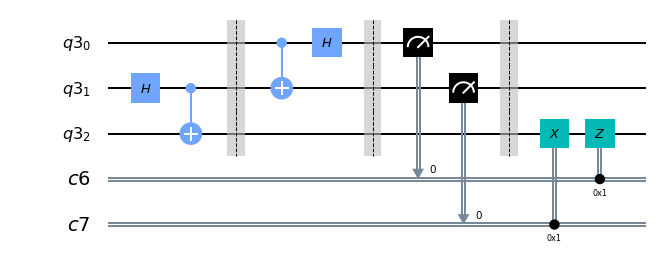

In [9]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
teleportation_circuit = QuantumCircuit(qreg, cregz, cregx)

## STAP 4.1
create_bell_pair(teleportation_circuit, 1, 2)

## STAP 4.2
teleportation_circuit.barrier() # Om de stappen te onderscheiden, gebruiken we een "barrier"
alice_gates(teleportation_circuit, 0, 1)

## STAP 4.3
measure_and_send(teleportation_circuit, 0 ,1)

## STAP 4.4
teleportation_circuit.barrier() # Gebruik terug een barriere om de stappen te onderscheiden
bob_gates(teleportation_circuit, 2, cregz, cregx)
# We bekijken ook terug eens hoe het circuit eruit ziet
teleportation_circuit.draw(output='mpl')

En klaar is kees ! De bit van Alice was geteleporteerd naar Bob. 

## 3. Het simuleren van het Teleportatie Protocol <a id='simulating'></a>

### 3.1 Hoe gaan we het Protocol testen op een Quantum Computer? <a id='testing'></a>

We gaan de qubit van Alice initialiseen in a toestand $\vert\psi\rangle$ (`psi`). Deze status gaan we creëren met behulp van een `Initialize` operatie op $|q_0\rangle$. Wij gaan hier aan `psi` een initiële waarde geven, maar je kan `psi` uiteraard een initiële waarde naar keuze geven.

In [10]:
# Creëer status van 1 qubit, bijvoorbeeld als volgt: 
psi = [np.sqrt(0.70), np.sqrt(0.30)]
print(psi)
# Aarzel niet om een andere waarde voor psi op te geven. 
# Maar waak erover dat de som van de absolute waarden van de coëficienten 1 is.

[0.8366600265340756, 0.5477225575051661]


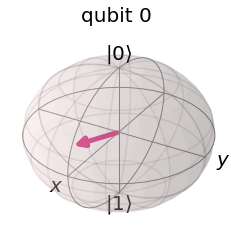

In [11]:
# We tonen de psi op een Bloch Sphere
plot_bloch_multivector(psi)

Laten we de initialisatie Gate creëren, $|\psi\rangle$, startende vanuit de status $|0\rangle$:

In [12]:
init_gate = Initialize(psi)
init_gate.label = "init"

Als ons Quantum Teleportatie Circuit inderdaad werkt, dan zal het Circuit op het einde de qubit $|q_2\rangle$ in deze toestand zijn. We gaan dit nu eens verifiëren met de Toetstandsvecor ("Statevector") simulator.

# 3.2 We gebruiken de Statevector Simulator <a id='simulating-sv'></a>

Werd onze qubit inderdaad geteleporteerd ?

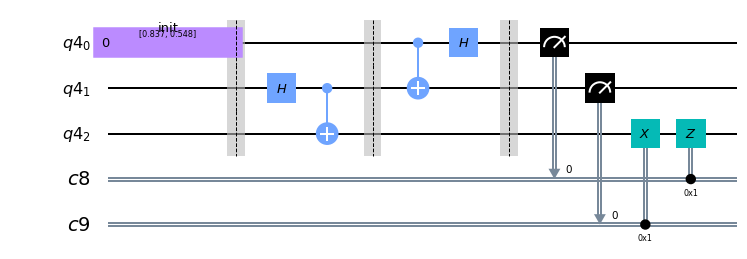

In [13]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
qcirc = QuantumCircuit(qreg, cregz, cregx)

## STAP 3.2.0
# Eerst initiaiseren we de q0 van Alice
qcirc.append(init_gate, [0])
qcirc.barrier()

## STAP 3.2.1
# Nu begint het teleportatie protocol
create_bell_pair(qcirc, 1, 2)
qcirc.barrier()

## STAP 3.2.2
# Stuur q1 naar Alice en q2 naar Bob
alice_gates(qcirc, 0, 1)

## STAP 3.2.3
# Alice stuurt haar classical bits naar Bob
measure_and_send(qcirc, 0, 1)

## STAP 3.2.4
# Bob decodeert qubits
bob_gates(qcirc, 2, cregz, cregx)

# Display the circuit
qcirc.draw(output='mpl')

Laten we hieronder, gebruik makende van de "Statevector simulator", eens nagaan dat de status van $|q_2\rangle$ dezelfde is al de toestand van $|\psi\rangle$, die we hierboven creëerden, en dit terwijl de toestanden van $|q_0\rangle$ and $|q_1\rangle$ in elkaar gestuikt zijn ("collapsed" is de Engelse term) tot ofwel $|0\rangle$, dan wel $|1\rangle$. De status $|\psi\rangle$ werd geteleporteerd van qubit 0 naar qubit 2.

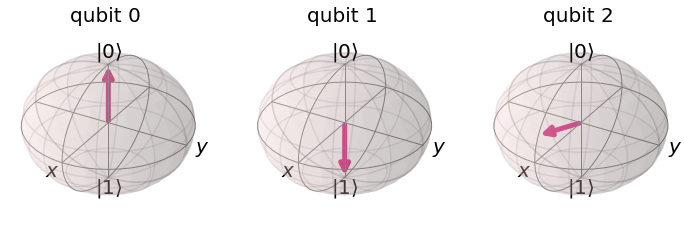

In [14]:
backend = BasicAer.get_backend('statevector_simulator')
output_vector = execute(qcirc, backend).result().get_statevector()
plot_bloch_multivector(output_vector)

Niet overtuigd? Voer de cel gerust een aantal keren uit! Je zal opmerken dat qubits 0 en 1 van toestand veranderen, maar dat qubit 2 altijd in the status $|\psi\rangle$ uitkomt. 

# 3.3 We gebruiken de QASM Simulator <a id='simulating-qs'></a>

Quantum Teleportatie is ontworpen om qubits tussen 2 partijen te sturen. We hebben dan wel de hardware nog niet om dit te  demonstreren, we kunnen aantonen dat de Gates de correct transformaties uitvoeren op één enkele Quantum Chip. We gebruiken nu de QASM Simulator om te simuleren hoe we ons protocol kunnen testen. 

Op een echte Quantum Computer zouden we niet in staat zijn de Statevector een voorbeeldwaarde te geven, zodat we een andere aanpak nodig heebn om na te gaan of ons Teleportatie Circuit werkt. In 3.1. gebruikten we deze aanpak om de $|0\rangle$ qubit in de status $|\psi\rangle$ om te zetten:

$$ |0\rangle \xrightarrow{\text{Initialise}} |\psi\rangle $$

Aangezien alle Quantum Gates unitair en omkeerbaar zijn, kunnen we de inverse van de "Initialise" vinden: 

In [15]:
inverse_init_gate = init_gate.gates_to_uncompute()

Deze operatie heeft de eigenschap: 

$$ |\psi\rangle \xrightarrow{\text{Inverse Initialise}} |0\rangle $$

Om te bewijzen dat qubit $|q_0\rangle$ werd geteleporteerd naar $|q_2\rangle$, als we de inverse initialisatie op $|q_2\rangle$ doen, verwachten we om $|0\rangle$ te meten. Dit doen we met het onderstaande circuit below:

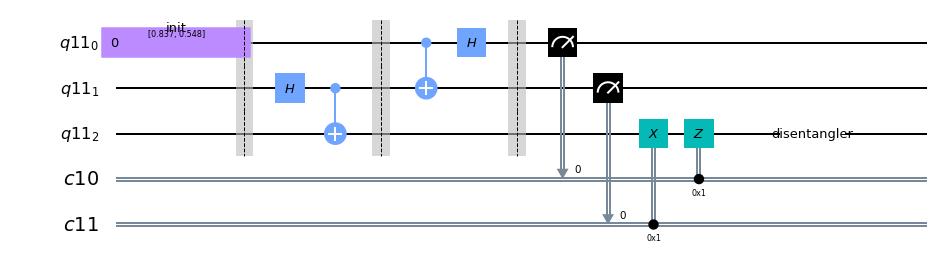

In [16]:
## Initieel Opzetten
qreg = QuantumRegister(3)    # Het protocol gebruikt 3 qubits
cregz = ClassicalRegister(1) # Het protocol gebruikt 2 classical bits in 2 verschillende registers
cregx = ClassicalRegister(1) # Omwille van de leesbaarheid geven we deze verschillende namen
qcirc = QuantumCircuit(qreg, cregz, cregx)

## STEP 3.3.0
# We initialiseren eerst de q0 van Aice
qcirc.append(init_gate, [0])
qcirc.barrier()

## STEP 3.3.1
# Nu begit het teleportatie protocal
create_bell_pair(qcirc, 1, 2)
qcirc.barrier()

## STEP 3.3.2
# Stuur q1 naar Alice en q2 naar Bob
alice_gates(qcirc, 0, 1)

## STEP 3.3.3
# Alice stuurt dan haar "classical bits" naar Bob
measure_and_send(qcirc, 0, 1)

## STEP 3.3. 4
# Bob decodeert de qubits
bob_gates(qcirc, 2, cregz, cregx)

## STEP 3.3.5
# Keer het initialisatie process om
qcirc.append(inverse_init_gate, [2])

# Teken the circuit
qcirc.draw(output='mpl')

Tot slot meten we de derde qubit and slaan het resultaat op in de derde classical bit:

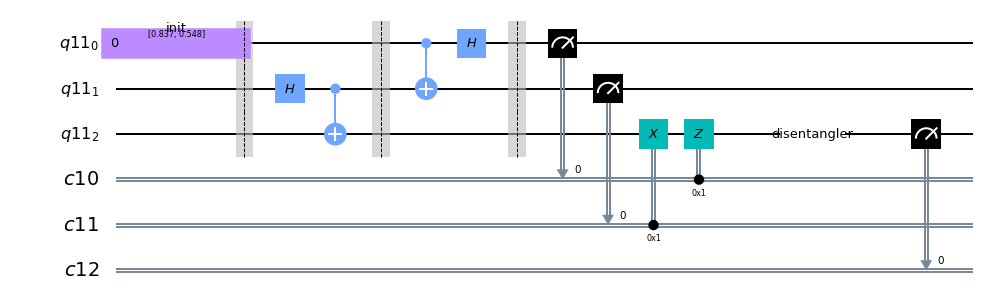

In [17]:
# We moeten een bijkimend ClassicalRegister toevoegen om het resultaat te zien
cr_result = ClassicalRegister(1)
qcirc.add_register(cr_result)
qcirc.measure(2,2)
qcirc.draw(output='mpl')

We voeren nu het experiment uit: 

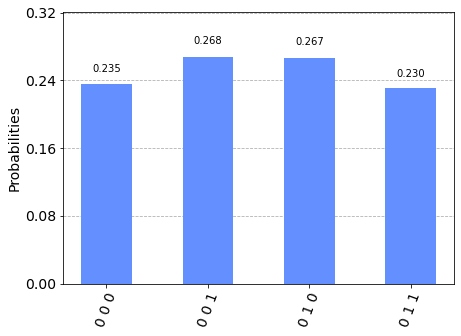

In [18]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qcirc, backend, shots=1024).result().get_counts()
plot_histogram(counts)

En... we hebben een kans van 100% om de qubit $q_2$ (telkens uiterst links in de string) te meten in de toestand $|0\rangle$. Dit is het resultaat dat we verwachtten! Het Teleportatie Protocal heet correct gewerkt!

# 4. Teleportation op a echte Quantum Computer <a id='real_qc'></a>

Hoe lossen we het probleem op dat Quantum Computers nog geen instructies na metingen ondersteunen? 
Als dit opgelost is, hoe vinden we het Quantum Device met de laagste bezettingsgraad? 
En... treden er geen errors op bij echte Quantum Computers?

Het antwoord vind je in het Qiskit Textbook, naast zovele andere interessante dingen !


# 5. Referenties <a id='references'></a>
Dit notebook is volledig gebaseerd op de inhoud van het Qiskit Textbook, met enkele aanpassingen. 
Het Qiskit Textbook verwijst naar:
"M. Nielsen and I. Chuang, Quantum Computation and Quantum Information, Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000)".

In [25]:
# Tot slot tonen we nog even de gebruikte versies
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.3',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.3',
 'qiskit': '0.19.6'}